   adult                     backdrop_path        genre_ids   id  \
0  False  /zfbjgQE1uSd9wiPTX4VzsLi0rGG.jpg         [18, 80]  278   
1  False  /tmU7GeKVybMWFButWEGl2M4GeiP.jpg         [18, 80]  238   
2  False  /kGzFbGhp99zva6oZODW5atUtnqi.jpg         [18, 80]  240   
3  False  /zb6fM1CX41D9rF9hdgclu0peUmy.jpg  [18, 36, 10752]  424   
4  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg             [18]  389   

  original_language            original_title  \
0                en  The Shawshank Redemption   
1                en             The Godfather   
2                en     The Godfather Part II   
3                en          Schindler's List   
4                en              12 Angry Men   

                                            overview  popularity  \
0  Imprisoned in the 1940s for the double murder ...     115.354   
1  Spanning the years 1945 to 1955, a chronicle o...     135.414   
2  In the continuing saga of the Corleone crime f...      74.289   
3  The true story of how

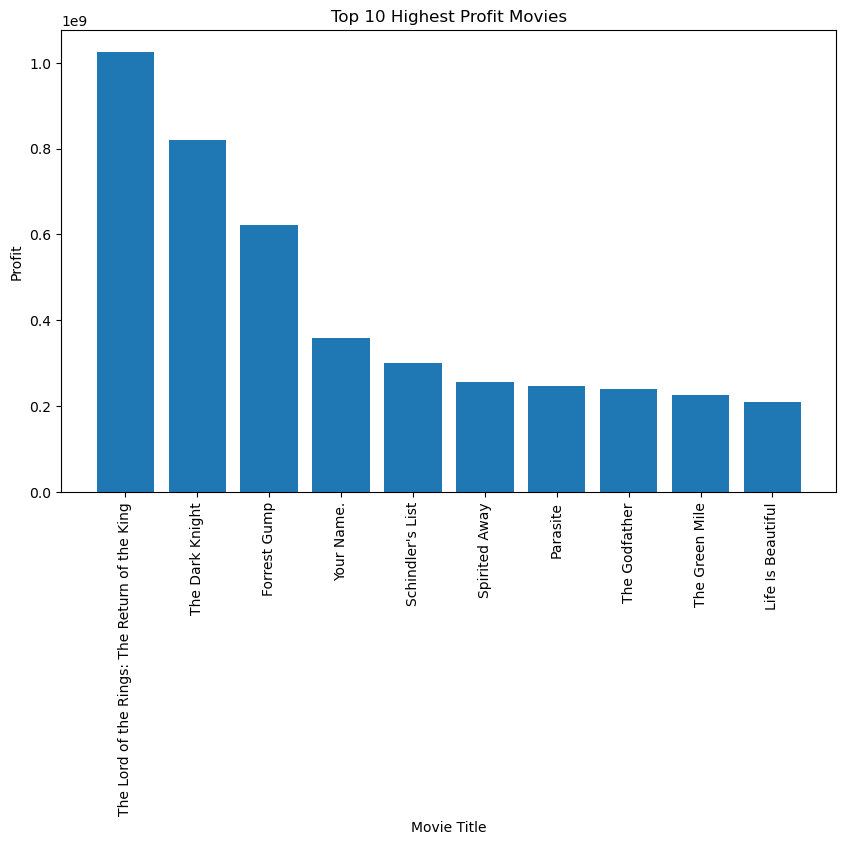

                             title    budget    revenue     profit
16          Grave of the Fireflies   3700000     516962   -3183038
17                   Seven Samurai   2000000     346300   -1653700
0         The Shawshank Redemption  25000000   28341469    3341469
4                     12 Angry Men    397751    4360000    3962249
18                 Cinema Paradiso   5000000   11990401    6990401
14                      GoodFellas  25000000   46800000   21800000
15  The Good, the Bad and the Ugly   1200000   38900000   37700000
5      Dilwale Dulhania Le Jayenge  13200000  100000000   86800000
2            The Godfather Part II  13000000  102600000   89600000
11                    Pulp Fiction   8500000  213928762  205428762


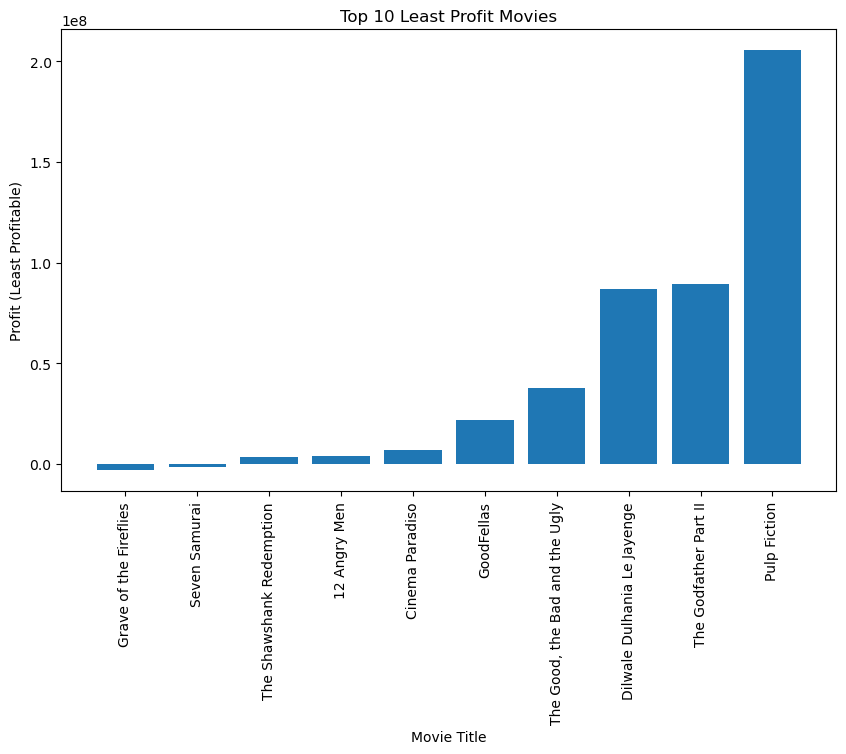

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define API Key and base URL
tmdb_base_url = 'https://api.themoviedb.org/3/'
#replace with your api key, removed before placing on github
tmdb_api_key = ""

# Function to fetch top rated movies
def fetch_top_rated_movies(api_key):
    url = f'{tmdb_base_url}movie/top_rated?api_key={api_key}&language=en-US&page=1'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'results' in data:
            return data['results']
        else:
            print("Key 'results' not found in the response.")
            print("Response:", data)
            return []
    else:
        print(f"Error fetching data: {response.status_code}")
        return []

# Function to fetch movie details including budget and revenue
def fetch_movie_details(api_key, movie_id):
    url = f'{tmdb_base_url}movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error fetching data for movie ID {movie_id}: {response.status_code}")
        return {}

# Fetch top rated movies
top_rated_movies = fetch_top_rated_movies(tmdb_api_key)

# Convert to DataFrame if there are results
if top_rated_movies:
    movies_df = pd.DataFrame(top_rated_movies)
    # Display the DataFrame
    print(movies_df.head())

    # Save DataFrame to pickle file
    movies_df.to_pickle('top_rated_movies.pkl')

    # Fetch additional data for top 20 movies
    movie_ids = movies_df['id'][:20]  # Adjust the number as needed

    movie_details_data = []

    for movie_id in movie_ids:
        details = fetch_movie_details(tmdb_api_key, movie_id)
        if details:
            movie_details_data.append(details)

    # Convert to DataFrame if there are details
    if movie_details_data:
        movie_details_df = pd.DataFrame(movie_details_data)

        # Filter out movies with missing budget or revenue data
        movie_details_df = movie_details_df.dropna(subset=['budget', 'revenue'])

        # Ensure budget and revenue are numeric
        movie_details_df['budget'] = pd.to_numeric(movie_details_df['budget'])
        movie_details_df['revenue'] = pd.to_numeric(movie_details_df['revenue'])

        # Calculate profit as the difference between revenue and budget
        movie_details_df['profit'] = movie_details_df['revenue'] - movie_details_df['budget']

        # Display the DataFrame with the profit column
        print(movie_details_df[['title', 'budget', 'revenue', 'profit']].head())

        # Save DataFrame to pickle file
        movie_details_df.to_pickle('movie_details_cleaned.pkl')

        # Sort the DataFrame by profit in descending order and select the top 10 movies
        top_10_profit_movies = movie_details_df.sort_values(by='profit', ascending=False).head(10)

        # Display the top 10 movies by profit
        print(top_10_profit_movies[['title', 'budget', 'revenue', 'profit']])

        # Plot the top 10 highest profit movies
        plt.figure(figsize=(10, 6))
        plt.bar(top_10_profit_movies['title'], top_10_profit_movies['profit'])
        plt.xlabel('Movie Title')
        plt.ylabel('Profit')
        plt.title('Top 10 Highest Profit Movies')
        plt.xticks(rotation=90)
        plt.show()

        # Sort the DataFrame by profit in ascending order and select the top 10 movies with the least profit
        least_10_profit_movies = movie_details_df.sort_values(by='profit', ascending=True).head(10)

        # Display the top 10 movies with the least profit
        print(least_10_profit_movies[['title', 'budget', 'revenue', 'profit']])

        # Plot the top 10 least profit movies
        plt.figure(figsize=(10, 6))
        plt.bar(least_10_profit_movies['title'], least_10_profit_movies['profit'])
        plt.xlabel('Movie Title')
        plt.ylabel('Profit (Least Profitable)')
        plt.title('Top 10 Least Profit Movies')
        plt.xticks(rotation=90)
        plt.show()
else:
    print("No top-rated movies data found.")


In [7]:
import pandas as pd

# Function to fetch movie details including revenue
def fetch_movie_details(api_key, movie_id):
    url = f'{tmdb_base_url}movie/{movie_id}?api_key={api_key}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error fetching data for movie ID {movie_id}: {response.status_code}")
        return {}

# Function to fetch movies with revenue data
def fetch_movies_with_revenue(api_key, max_pages=10):
    movies_with_revenue = 0
    page = 1
    while page <= max_pages:
        url = f'{tmdb_base_url}discover/movie?api_key={api_key}&language=en-US&page={page}'
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            for movie in data['results']:
                movie_details = fetch_movie_details(api_key, movie['id'])
                if 'revenue' in movie_details and movie_details['revenue'] > 0:
                    movies_with_revenue += 1
            page += 1
        else:
            print(f"Error fetching data: {response.status_code}")
            break
    return movies_with_revenue

# Fetch the number of movies with revenue data (limiting to the first 10 pages for demonstration)
movies_with_revenue_count = fetch_movies_with_revenue(tmdb_api_key, max_pages=10)
print(f"Number of movies with revenue data in the first 10 pages: {movies_with_revenue_count}")


Number of movies with revenue data in the first 10 pages: 115
